Dataset link : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification.
* In this notebook we are going to predict the price of Smartphone and do the basic EDA.

### Data Dictionary
1. `wifi`: Has wifi or not
2. `battery_power` : Total energy a battery can store in one time measured in mAh\
3. `blue` : Has bluetooth or not
4. `clock_speed` : speed at which microprocessor executes instructions
5. `dual_sim` : Has dual sim support or not
6. `fc` : Front Camera mega pixels
7. `four_g` : Has 4G or not
8. `int_memory` : Internal Memory in Gigabytes
9. `m_dep` : Mobile Depth in cm
10. `mobile_wt` : Weight of mobile phone
11. `n_cores`: Number of cores of processor
12. `pc`: Primary Camera mega pixels
13. `px_height`: Pixel Resolution Height
14. `px_width` : Pixel Resolution Width
15. `ram` : Random Access Memory in Megabytes
16. `sc_h` : Screen Height of mobile in cm
17. `sc_w` : Screen Width of mobile in cm
18. `talk_time` : longest time that a single battery charge will last when you are
19. `three_g`: Has 3G or no
20. `touch_screen` : Has touch screen or not


In [2]:
# Importing Dependiences/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings

input\test.csv
input\train.csv


In [3]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')
df_train.shape

(2000, 21)

In [4]:
df_train.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [5]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
# checking for missing values
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
df_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### EDA

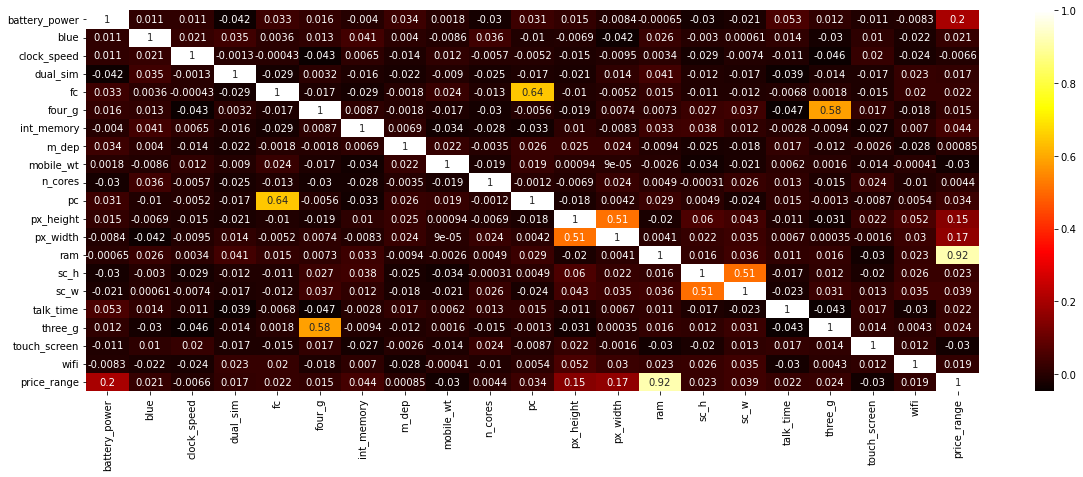

In [11]:
# Calculating Corelation 
corr = df_train.corr()
# Plotting Corelation 
plt.figure(figsize=(20,7))
sns.heatmap(corr,cbar=True,annot=True,cmap="hot")
plt.show()

##### There are very less linear correlations in the data.
1. But one of the formost is relation among Price and Ram which are strongly correlated by a score of  0.92 .
2. The second highset Correlation is between  pc  and  fc  with a score of  0.64 .
3. The third strongest relation is between  3G  and  4G  with score  0.58 .


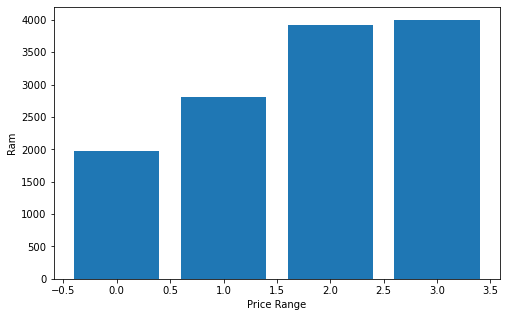

In [12]:
plt.figure(figsize=(8,5))
plt.bar(df_train.price_range,df_train.ram)
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

This shows as Ram increases the price also rise up.

In [13]:
df_train['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [14]:
df_train['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

 Here we have 1523 3G phones and 1043 4G phones

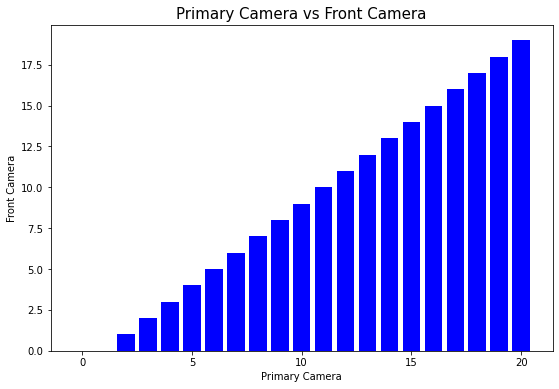

In [15]:
plt.figure(figsize=(9,6))
plt.title('Primary Camera vs Front Camera',fontsize=15)
plt.bar(df_train.pc,df_train.fc,color='blue')
plt.xlabel('Primary Camera')
plt.ylabel('Front Camera')
plt.show()

There are too many features in the data, Let's get rid of some unwanted features.

In [16]:
# # Splitting
# X_train, y_train = df_train.drop(["price_range"],axis=1), df_train.price_range

# # Intializing Feature Selector
# feature_selector = RandomForestClassifier()
# feature_selector.fit(X_train,y_train)

# # Potting Data
# features = X_train.columns
# feature_imps = feature_selector.feature_importances_
# mean_imp = feature_imps.mean()

# # Plotting
# plt.figure(figsize=(20,8))
# plt.title("Feature Importnace",fontsize=15)
# plt.bar(features,feature_imps,color="orange",label="Not Important")
# plt.bar(features[feature_imps>mean_imp],feature_imps[feature_imps>mean_imp],color="r",label="Important")
# plt.axhline(mean_imp,color="k",linestyle="dashed")
# plt.xlabel("Features",fontsize=12)
# plt.ylabel("Importace Score",fontsize=12)
# plt.legend(fontsize=22)
# plt.show()

Ram is acting as an outlier and changing the threshold mean for all the features in the show plot. so only 4 Features are above the threshold(i.e mean). Let's remove Ram and see the plot again.

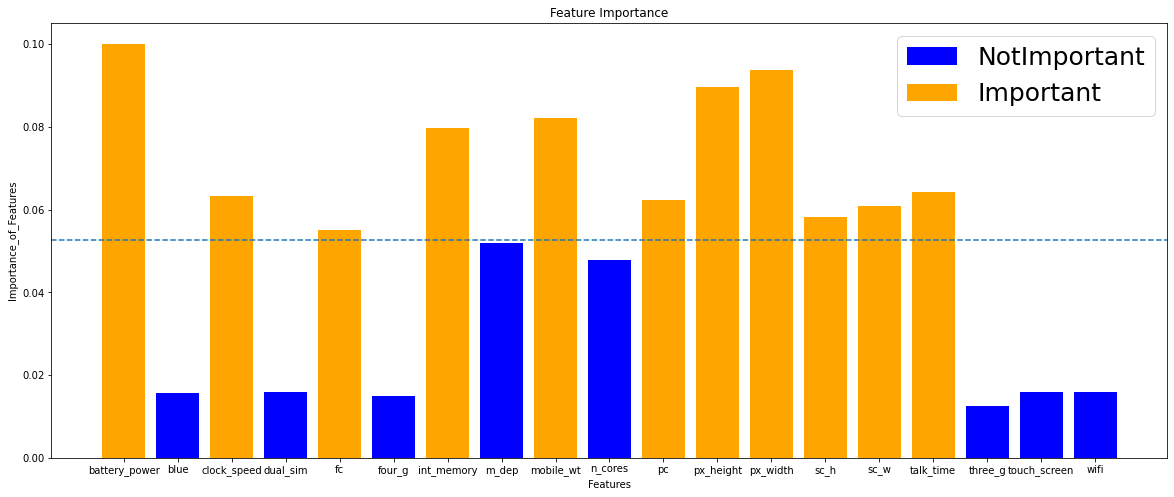

In [17]:
# Splitting 
X_train , y_train = df_train.drop(['price_range','ram'],axis=1),df_train.price_range

# Initializing Feature selector
feature_selector = RandomForestClassifier()
feature_selector.fit(X_train,y_train)

# Plotting Data
features = X_train.columns
feature_imps = feature_selector.feature_importances_
mean_imps = feature_imps.mean()

# Plotting
plt.figure(figsize=(20,8))
plt.title('Feature Importance')
plt.bar(features,feature_imps,color='blue',label='NotImportant')
plt.bar(features[feature_imps>mean_imps],feature_imps[feature_imps>mean_imps],color='orange',label='Important')
plt.axhline(mean_imps,linestyle='dashed')
plt.xlabel('Features')
plt.ylabel('Importance_of_Features')
plt.legend(fontsize=25)
plt.show()

Now you can choose how many features you want to keep, I will keep just the 4 Most Important Features. As the  RAM  and  Battery   Power  are the 2 most important features.

Dropping Unwanted Features

In [18]:
unwanted_features = ['blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
df_train.drop(unwanted_features,axis=1,inplace=True)
df_test.drop(unwanted_features,axis=1,inplace=True)
df_test.drop(["id"],axis=1,inplace=True)

Scaling Features

StandardScaler removes the mean and scales the data to unit variance. The scaling shrinks the range of the feature values

In [19]:
X,y = df_train.drop(['price_range'],axis=1),df_train.price_range
scaler = StandardScaler()
train_scaled, test_scaled = scaler.fit_transform(X), scaler.transform(df_test)

Spliting Data
Remember there is no target class for  Test   Set , for measuring performance it is needed that's why a validation set is created.

In [20]:
X_train, X_val, y_train, y_val = train_test_split(train_scaled,y,test_size=0.2)

KNN Classifier

In [21]:
# Model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

# Performance
knn_train_pred, knn_val_pred = knn.predict(X_train), knn.predict(X_val)
knn_train_acc, knn_val_acc = accuracy_score(y_train,knn_train_pred), accuracy_score(y_val,knn_val_pred)
print(f"Training Set Accuracy : {np.round(knn_train_acc,2)*100}")
print(f"Validation Set Accuracy : {np.round(knn_val_acc,2)*100}")

Training Set Accuracy : 94.0
Validation Set Accuracy : 85.0


Random Forest

In [22]:
# Model
rfc = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5,bootstrap=True,warm_start=True,n_jobs=-1,random_state=42)
rfc.fit(X_train,y_train)

# Performance
rfc_train_pred, rfc_val_pred = rfc.predict(X_train), rfc.predict(X_val)
rfc_train_acc, rfc_val_acc = accuracy_score(y_train,rfc_train_pred), accuracy_score(y_val,rfc_val_pred)
print(f"Training Set Accuracy : {np.round(rfc_train_acc,2)*100}")
print(f"Validation Set Accuracy : {np.round(rfc_val_acc,2)*100}")

Training Set Accuracy : 100.0
Validation Set Accuracy : 92.0


XG Boost

In [23]:
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)

# Performance
xgboost_train_pred, xgboost_val_pred = xgboost.predict(X_train), xgboost.predict(X_val)
xgboost_train_acc, xgboost_val_acc = accuracy_score(y_train,xgboost_train_pred), accuracy_score(y_val,xgboost_val_pred)
print(f"Training Set Accuracy : {np.round(xgboost_train_acc,2)*100}")
print(f"Validation Set Accuracy : {np.round(xgboost_val_acc,2)*100}")

Training Set Accuracy : 100.0
Validation Set Accuracy : 92.0


Model Comparison

In [24]:
train_accs = np.array([knn_train_acc,rfc_train_acc,xgboost_train_acc])
mean_train_acc = np.mean(train_accs)
val_accs = np.array([knn_val_acc,rfc_val_acc,xgboost_val_acc])
mean_val_acc = np.mean(val_accs)
models = np.array(["KNN","RFC","XGBoost"])

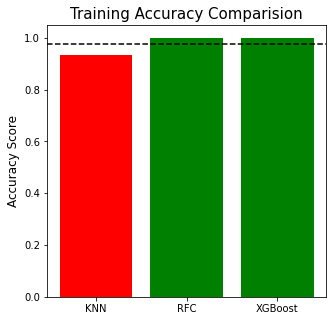

In [25]:
# Training Accuracy
plt.figure(figsize=(5,5))
plt.title("Training Accuracy Comparision",fontsize=15)
plt.bar(models,train_accs,color="red")
plt.bar(models[train_accs>mean_train_acc],train_accs[train_accs>mean_train_acc],color="g")
plt.axhline(mean_train_acc,color="k",linestyle="dashed")
plt.ylabel("Accuracy Score",fontsize=12)
plt.show()

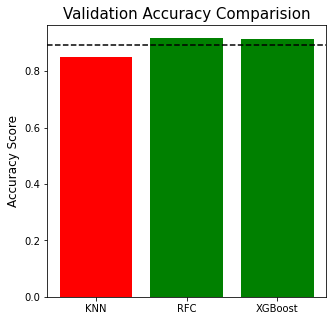

In [26]:
# Validation Accuracy
plt.figure(figsize=(5,5))
plt.title("Validation Accuracy Comparision",fontsize=15)
plt.bar(models,val_accs,color="red")
plt.bar(models[val_accs>mean_val_acc],val_accs[val_accs>mean_val_acc],color="g")
plt.axhline(mean_val_acc,color="k",linestyle="dashed")
plt.ylabel("Accuracy Score",fontsize=12)
plt.show()

In [27]:
# Test Data
a=rfc.predict(df_test)

C:\Users\Lenovo\desktop\ml-course\karan\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [28]:
b=xgboost.predict(df_test)